In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install nltk scikit-learn joblib pandas matplotlib jupyterlab


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2

   ---------------------------------------- 4/4 [isoduration]



DOWNLOADING NLTK DATASETS

In [2]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\bkaan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bkaan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bkaan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

DATA LOADING AND DISCOVERY

In [3]:
from nltk.corpus import movie_reviews
from collections import Counter
import random

documents = [(movie_reviews.raw(fid), cat)
             for cat in movie_reviews.categories()
             for fid in movie_reviews.fileids(cat)]
random.shuffle(documents)

X = [doc for doc, _ in documents]
y = [cat for _, cat in documents]

print("Toplam örnek:", len(X))
print("Sınıf dağılımı:", Counter(y))


Toplam örnek: 2000
Sınıf dağılımı: Counter({'neg': 1000, 'pos': 1000})


TRAIN/TEST SPLIT

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Train:", len(X_train), "Test:", len(X_test))


Train: 1600 Test: 400


Pipeline: TF-IDF + Naive Bayes

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.85, ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.85, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', MultinomialNB())])

VALIDATION

Accuracy: 0.8125
              precision    recall  f1-score   support

         neg       0.84      0.78      0.81       200
         pos       0.79      0.85      0.82       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



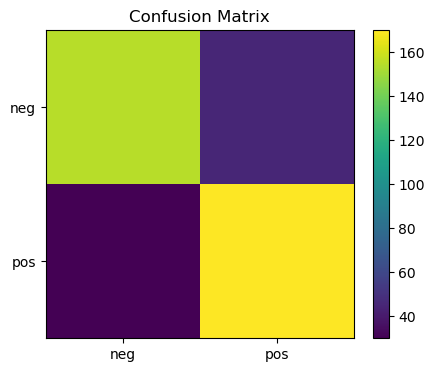

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.xticks(np.arange(len(pipeline.classes_)), pipeline.classes_)
plt.yticks(np.arange(len(pipeline.classes_)), pipeline.classes_)
plt.colorbar()
plt.title("Confusion Matrix")
plt.show()


SAVING MODEL

In [7]:
import os, joblib
os.makedirs('models', exist_ok=True)
joblib.dump(pipeline, 'models/sentiment_model.pkl')
print("Model kaydedildi: models/sentiment_model.pkl")


Model kaydedildi: models/sentiment_model.pkl


PREDICT FUNCTION

In [8]:
def predict_text(text, model=pipeline):
    pred = model.predict([text])[0]
    probs = model.predict_proba([text])[0]
    classes = model.classes_
    return pred, dict(zip(classes, probs.round(3)))

print(predict_text("An amazing story, brilliant acting and great direction."))
print(predict_text("Boring, predictable and too long."))


('pos', {'neg': 0.404, 'pos': 0.596})
('neg', {'neg': 0.635, 'pos': 0.365})


BASIC INTERACTIVE ENTERANCE

In [12]:
while True:
    text = input("Yorum gir (çıkmak için q): ")
    if text.lower() == 'q':
        break
    pred, probs = predict_text(text)
    print("Tahmin:", pred, "Olasılıklar:", probs)


Yorum gir (çıkmak için q):  q


In [16]:
with open("requirements.txt", "w") as f:
    f.write("nltk\nscikit-learn\njoblib\npandas\nmatplotlib\n")
print("requirements.txt oluşturuldu.")


requirements.txt oluşturuldu.


In [21]:
readme_content = """# Sentiment Analysis - Movie Reviews 🎬

This project uses the **NLTK** library's `movie_reviews` dataset to classify movie reviews as **positive** or **negative**.

## 🚀 Features
- Preloaded dataset from NLTK
- Text vectorization using TF-IDF
- Naive Bayes classifier
- Save and load trained models
- Predict sentiment from user input in terminal

## 📂 Project Structure
sentiment-analysis/
├── notebook.ipynb # Main Jupyter Notebook
├── requirements.txt # Required Python packages
├── README.md # Project documentation
└── models/ # (Optional) Saved models
"""
with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_content)

print("README.md file created successfully.")



README.md file created successfully.
